In [1]:
!pip install ktrain

In [2]:
!pip install  pytorch-pretrained-bert

In [3]:
!pip install transformers

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import ktrain
from ktrain import text


In [5]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [6]:
df=pd.read_csv('drive/My Drive/IMDB_Dataset.csv')
df.head()

,Unnamed: 0,review,sentiment
0,49116,tries ape successful bad enough even try make ...,0
1,45682,one ugly badly absolutely destroyed book could...,0
2,28538,let tell movie exceeds troma laugh gore movies...,0
3,17859,tyra rest modeling world needs know real women...,0
4,41040,characters rip seen characters script tries ed...,0


**Visualization**

<Axes: xlabel='sentiment', ylabel='count'>

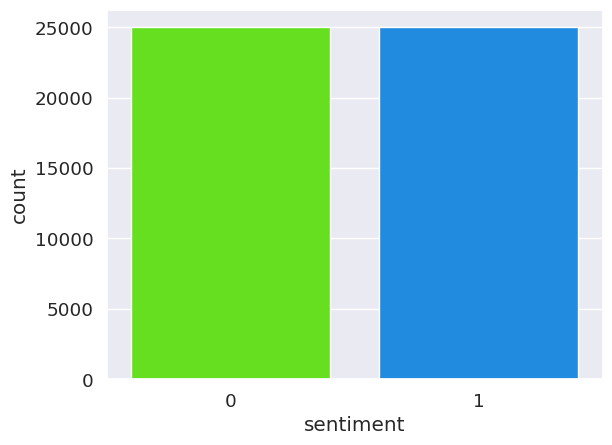

In [7]:
sns.set(style = "darkgrid" , font_scale = 1.2)
sns.countplot(data=df,x=df['sentiment'],palette='gist_rainbow')

**Checking for any missing values**

In [8]:
df.isna().sum()

Unnamed: 0    0
review        1
sentiment     0
dtype: int64

In [9]:
from sklearn.utils import shuffle
# just shuffle the data so we can further split it into train and test.
df = shuffle(df)

In [10]:
df.to_csv('drive/My Drive/IMDB_Dataset.csv')

**spliting the data into train and test**

In [11]:
data_train = df[:40000]
data_test = df[-10000:]

(data_train.shape, data_test.shape)

((40000, 3), (10000, 3))

In [12]:
(x_train, y_train),(x_test,y_test), preprocess = text.texts_from_df(
                                                train_df = data_train,
                                                text_column = 'review',
                                                label_columns = 'sentiment',
                                                val_df = data_test,
                                                maxlen = 400,
                                                preprocess_mode = 'bert'
)

['not_sentiment', 'sentiment']
       not_sentiment  sentiment
36500            1.0        0.0
34415            1.0        0.0
32205            0.0        1.0
25357            1.0        0.0
17466            1.0        0.0
['not_sentiment', 'sentiment']
       not_sentiment  sentiment
30855            1.0        0.0
5149             1.0        0.0
4615             0.0        1.0
21448            1.0        0.0
10453            1.0        0.0
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [13]:
model = text.text_classifier(name = 'bert',
                             train_data = (x_train, y_train),
                             preproc = preprocess
                            )

Is Multi-Label? False
maxlen is 400


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [14]:
learner = ktrain.get_learner(model = model,
                              train_data = (x_train, y_train),
                              val_data = (x_test, y_test),
                              batch_size = 6
                            )

**simulating training for different learning rates**

In [15]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/1024
6667/6667 [==============================] - 920s 134ms/step - loss: 3.4320 - accuracy: 0.5758


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


The learner takes 16 minutes when using a T4 Ram

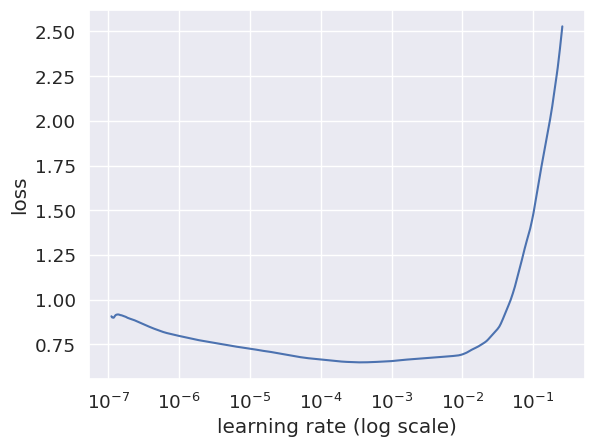

In [16]:
learner.lr_plot()

From the above learner, I am using the lr = 2e-5 with epochs=1 for a good fit.

In [17]:
learner.fit_onecycle(lr = 2e-5, epochs = 1)



begin training using onecycle policy with max lr of 2e-05...
6667/6667 [==============================] - 4425s 660ms/step - loss: 0.3386 - accuracy: 0.8498 - val_loss: 0.2629 - val_accuracy: 0.8931


In [18]:
predictor = ktrain.get_predictor(learner.model, preprocess)

In [27]:
test_data =['Barbie 2023 is a tour de force that has left me utterly captivated, enchanted, and spellbound. Every moment of this cinematic marvel was nothing short of pure excellence, deserving nothing less than a perfect 10 out of 10 rating!']
# sample test data prediction.
for a in predictor.predict(test_data):
  if a=='not_sentiment':
    print('NEGATIVE')
  else:
    print('POSITIVE')

POSITIVE


In [28]:
test_data =['A delightful diversion from the MCU as we know it, Loki successfully sees star Tom Hiddleston leap from beloved villain to endearing antihero -- with a little help from Owen Wilson -- in a series that\'s as off-kilter, charming, and vaguely dangerous as the demigod himself.']
# sample test data prediction.
for a in predictor.predict(test_data):
  if a=='not_sentiment':
    print('NEGATIVE')
  else:
    print('POSITIVE')

POSITIVE


In [30]:
txt = ['This movie does not provide the provocative commentary on female empowerment, feminism, or gender relations that Gerwig seems to think it does. Gerwig presents a one-note movie with surface-level attempts to be subversive in the domain of gender relations but fails to hit the mark.']
# sample test data prediction.
for a in predictor.predict(txt):
  if a=='not_sentiment':
    print('NEGATIVE')
  else:
    print('POSITIVE')

NEGATIVE


In [33]:
predictor.save('drive/My Drive/albert')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
